## O que veremos neste Jupyter Notebook?

1. Remover uma váriavel do arquivo
1. Adicionar uma nova variável no arquivo
1. Salva o resultado em um arquivo NetCDF
1. Renomear variáveis
1. Renomear dimensão
1. Reordenar dimensão
1. Concatenar (juntar) arquivos

## O que vou aprender no fim deste Jupyter Notebook?

**Noções** sobre manipulação e processamento de dados no formato NetCDF.

## Importação de bibliotecas

In [152]:
import xarray as xr

## Leitura recomendada

[https://xarray.pydata.org/en/v2022.11.0/getting-started-guide/quick-overview.html](https://xarray.pydata.org/en/v2022.11.0/getting-started-guide/quick-overview.html)

## Abertura do arquivo

In [153]:
ds = xr.open_dataset("../dados/ERA5_Superficie_2021.nc")

## Explorar o conteúdo do arquivo aberto

In [154]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

## Processamento do arquivo

### Remover uma váriavel do arquivo

In [155]:
drop_tp = ds.drop_vars("tp")

### Remover várias variáveis do arquivo

In [156]:
drop = ds.drop_vars(["tp", "u10", "v10", "msl", "sp"])

Converte de Kelvin para Celsius.

In [157]:
tdc = drop["d2m"] - 273.15
ttc = drop["t2m"] - 273.15

Adiciona atributo ```units``` as variáveis criadas (tdc e ttc).

In [158]:
tdc.attrs['units'] = '°C' # Adiciona a unidade da variável de temperatura do ponto de orvalho.
ttc.attrs['units'] = '°C' # Adiciona a unidade da variávelde temperatura.

### Adicionar uma nova variável no arquivo

In [159]:
ds.assign(tt = ds['t2m'] - 273.15)
ds.assign(td = ds['d2m'] - 273.15)

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 295.8 295.8 ... 284.0 284.0
    t2m        (time, latitude, longitude) float32 298.8 298.7 ... 288.1 288.1
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    td         (time, latitude, longitude) float32 22.65 22.62 ... 10.88 10.88
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [160]:
new_ds = ds.assign(tt = ds['t2m'] - 273.15)
new_ds1 = new_ds.assign(td = ds['d2m'] - 273.15)

new_ds1.tt.attrs['units'] = '°C' # Adiciona a unidade da variável de temperatura do ponto de orvalho.
new_ds1.td.attrs['units'] = '°C'

In [161]:
new_ds1

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 295.8 295.8 ... 284.0 284.0
    t2m        (time, latitude, longitude) float32 298.8 298.7 ... 288.1 288.1
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    tt         (time, latitude, longitude) float32 25.61 25.53 ... 14.93 14.93
    td         (time, latitude, longitude) float32 22.65 22.62 ... 10.88 10.88
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

Salva o resultado em um arquivo NetCDF.

In [162]:
new_ds1.to_netcdf("saida.nc")

In [163]:
new_ds1['td'].to_netcdf("td.nc")

### Renomear variáveis

Renomeia a variável de `tp` para `prec`.

In [164]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 295.8 295.8 ... 284.0 284.0
    t2m        (time, latitude, longitude) float32 298.8 298.7 ... 288.1 288.1
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [165]:
ds.rename({"tp":"prec"}) # Sempre será: "{antigo_nome":"novo_nome}".

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 295.8 295.8 ... 284.0 284.0
    t2m        (time, latitude, longitude) float32 298.8 298.7 ... 288.1 288.1
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    prec       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [166]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 295.8 295.8 ... 284.0 284.0
    t2m        (time, latitude, longitude) float32 298.8 298.7 ... 288.1 288.1
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [167]:
ds_rename = ds.rename({"tp":"prec"}) # Sempre será: "{antigo_nome":"novo_nome}".

In [168]:
ds_rename

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 295.8 295.8 ... 284.0 284.0
    t2m        (time, latitude, longitude) float32 298.8 298.7 ... 288.1 288.1
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    prec       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

Renomeia mais de uma variável.

In [169]:
ds_rename_tudo = ds.rename({"d2m":"td2m", "t2m":"tk2m", "sp":"pressure"})

In [170]:
ds_rename_tudo

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    td2m       (time, latitude, longitude) float32 295.8 295.8 ... 284.0 284.0
    tk2m       (time, latitude, longitude) float32 298.8 298.7 ... 288.1 288.1
    msl        (time, latitude, longitude) float32 ...
    pressure   (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

### Renomear dimensão

In [171]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 295.8 295.8 ... 284.0 284.0
    t2m        (time, latitude, longitude) float32 298.8 298.7 ... 288.1 288.1
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [172]:
ds_nova_dim = ds.swap_dims({"longitude":"lon", "latitude":"lat"})# Sempre será: "{antigo_nome":"novo_nome}".

In [173]:
ds_nova_dim

<xarray.Dataset>
Dimensions:    (lon: 281, lat: 201, time: 12)
Coordinates:
    longitude  (lon) float32 -90.0 -89.75 -89.5 -89.25 ... -20.5 -20.25 -20.0
    latitude   (lat) float32 10.0 9.75 9.5 9.25 ... -39.25 -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Dimensions without coordinates: lon, lat
Data variables:
    u10        (time, lat, lon) float32 ...
    v10        (time, lat, lon) float32 ...
    d2m        (time, lat, lon) float32 295.8 295.8 295.7 ... 284.0 284.0 284.0
    t2m        (time, lat, lon) float32 298.8 298.7 298.6 ... 288.1 288.1 288.1
    msl        (time, lat, lon) float32 ...
    sp         (time, lat, lon) float32 ...
    tp         (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

## Reordenar dimensão

In [174]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 295.8 295.8 ... 284.0 284.0
    t2m        (time, latitude, longitude) float32 298.8 298.7 ... 288.1 288.1
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [175]:
ds_transpose = ds.transpose("longitude", "time", "latitude")

In [176]:
ds_transpose

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (longitude, time, latitude) float32 ...
    v10        (longitude, time, latitude) float32 ...
    d2m        (longitude, time, latitude) float32 295.8 295.8 ... 284.2 284.0
    t2m        (longitude, time, latitude) float32 298.8 298.7 ... 288.4 288.1
    msl        (longitude, time, latitude) float32 ...
    sp         (longitude, time, latitude) float32 ...
    tp         (longitude, time, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

Inverter a ordem de todas as dimensões.

In [177]:
ds_transpose1 = ds.transpose()

In [178]:
ds_transpose1

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (longitude, latitude, time) float32 ...
    v10        (longitude, latitude, time) float32 ...
    d2m        (longitude, latitude, time) float32 295.8 295.7 ... 282.8 284.0
    t2m        (longitude, latitude, time) float32 298.8 299.0 ... 286.2 288.1
    msl        (longitude, latitude, time) float32 ...
    sp         (longitude, latitude, time) float32 ...
    tp         (longitude, latitude, time) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

## Concatenar (juntar) arquivos

In [179]:
ds1 = xr.open_dataset("../dados/t2m.2019.mes.01.nc")
ds2 = xr.open_dataset("../dados/t2m.2019.mes.02.nc")
ds3 = xr.open_dataset("../dados/t2m.2019.mes.03.nc")

In [180]:
ds4 = xr.concat([ds1, ds2, ds3], dim='time')

In [181]:
ds4

<xarray.Dataset>
Dimensions:    (time: 3, longitude: 281, latitude: 201)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 2019-03-01
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
Data variables:
    t2m        (time, latitude, longitude) float32 25.84 25.77 ... 14.78 14.78
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Jun 29 15:15:42 2022: cdo -splitmon -selyear,2019 t2m.e...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

## Abrir arquivos separados

Imagina que há vários arquivos, neste exemplo, **os arquivos estão separados por dias**.

In [182]:
ds = xr.open_mfdataset("../dados/chuva_diaria_merge_cptec/MERGE_CPTEC_????????.nc", combine='nested', concat_dim='time')

In [183]:
ds

<xarray.Dataset>
Dimensions:    (time: 92, longitude: 420, latitude: 410)
Coordinates:
  * time       (time) datetime64[ns] 2022-08-01 2022-08-02 ... 2022-10-31
  * longitude  (longitude) float64 -74.95 -74.85 -74.75 ... -33.25 -33.15 -33.05
  * latitude   (latitude) float64 -33.95 -33.85 -33.75 -33.65 ... 6.75 6.85 6.95
Data variables:
    prec       (time, latitude, longitude) float32 dask.array<chunksize=(1, 410, 420), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Fri Sep 09 08:59:55 2022: cdo -s -f nc4 -z zip9 -co...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

## Selecionar partes do arquivo

Neste item, será mostrado:
* Selecionar a partir da latitude e da longitude uma área de interesse.
* Selecionar data ou um conjunto de datas.

### Seleciona área de interesse

In [184]:
zoom = ds.sel(longitude=slice(-60, -30), latitude=slice(-30, -10))

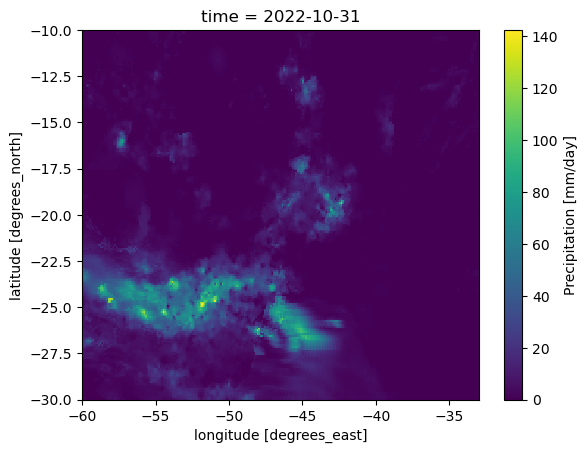

In [185]:
zoom['prec'][-1,:,:].plot()

### Selecionar um ponto de latitude e de longitude

In [186]:
ponto = ds.sel(longitude=-53, latitude=-25, method='nearest')

In [187]:
ponto

<xarray.Dataset>
Dimensions:    (time: 92)
Coordinates:
  * time       (time) datetime64[ns] 2022-08-01 2022-08-02 ... 2022-10-31
    longitude  float64 -52.95
    latitude   float64 -24.95
Data variables:
    prec       (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Fri Sep 09 08:59:55 2022: cdo -s -f nc4 -z zip9 -co...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

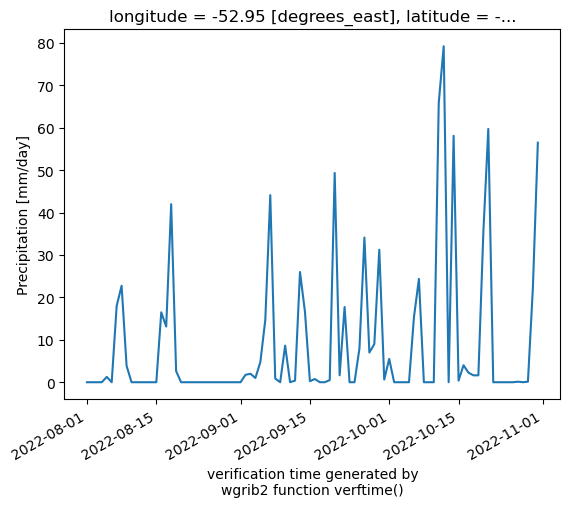

In [188]:
ponto.prec.plot()

### Seleciona data de interesse

In [189]:
data1 = ds.sel(time='2022-10-31')

In [190]:
data1

<xarray.Dataset>
Dimensions:    (longitude: 420, latitude: 410)
Coordinates:
    time       datetime64[ns] 2022-10-31
  * longitude  (longitude) float64 -74.95 -74.85 -74.75 ... -33.25 -33.15 -33.05
  * latitude   (latitude) float64 -33.95 -33.85 -33.75 -33.65 ... 6.75 6.85 6.95
Data variables:
    prec       (latitude, longitude) float32 dask.array<chunksize=(410, 420), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Fri Sep 09 08:59:55 2022: cdo -s -f nc4 -z zip9 -co...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

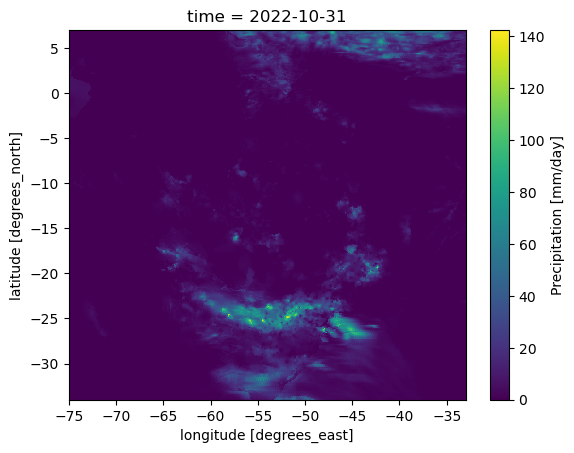

In [191]:
data1['prec'].plot()

### Seleciona um período de interesse

In [192]:
data2 = ds.sel(time=slice("2022-09-15", "2022-10-15"))

In [193]:
data2

<xarray.Dataset>
Dimensions:    (time: 31, longitude: 420, latitude: 410)
Coordinates:
  * time       (time) datetime64[ns] 2022-09-15 2022-09-16 ... 2022-10-15
  * longitude  (longitude) float64 -74.95 -74.85 -74.75 ... -33.25 -33.15 -33.05
  * latitude   (latitude) float64 -33.95 -33.85 -33.75 -33.65 ... 6.75 6.85 6.95
Data variables:
    prec       (time, latitude, longitude) float32 dask.array<chunksize=(1, 410, 420), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Fri Sep 09 08:59:55 2022: cdo -s -f nc4 -z zip9 -co...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

## Acumulado semanal de precipitação

In [ ]:
acumulado_semanal = ds.resample(time='W').sum()

In [ ]:
# 01/08 a 07/08 = tempo 1
# 08/08 a 14/08 = tempo 2
# 15/08 a 21/08 = tempo 3
# 22/08 a 28/08 = tempo 4
# 29/08 a 04/09 = tempo 5
# 05/09 a 11/09 = tempo 6
# 12/09 a 18/09 = tempo 7
# 19/09 a 25/09 = tempo 8
# 26/09 a 02/10 = tempo 9
# 03/09 a 09/10 = tempo 10
# 10/10 a 16/10 = tempo 11
# 17/10 a 23/10 = tempo 12
# 24/10 a 30/10 = tempo 13
# 31/10 a 06/11 = tempo 14
acumulado_semanal

<xarray.Dataset>
Dimensions:    (longitude: 420, latitude: 410, time: 14)
Coordinates:
  * longitude  (longitude) float64 -74.95 -74.85 -74.75 ... -33.25 -33.15 -33.05
  * latitude   (latitude) float64 -33.95 -33.85 -33.75 -33.65 ... 6.75 6.85 6.95
  * time       (time) datetime64[ns] 2022-08-07 2022-08-14 ... 2022-11-06
Data variables:
    prec       (time, latitude, longitude) float32 dask.array<chunksize=(1, 410, 420), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Fri Sep 09 08:59:55 2022: cdo -s -f nc4 -z zip9 -co...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

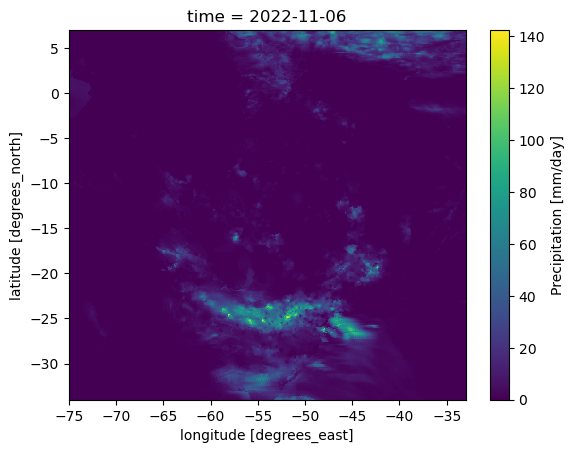

In [ ]:
acumulado_semanal.prec[-1,:,:].plot()

## Acumulado mensal de precipitação

* Leitura recomendada: [Resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)

In [194]:
# Outras possibilidades:
# https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
# https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4
acumulado_mensal = ds.resample(time='MS').sum()

In [195]:
acumulado_mensal

<xarray.Dataset>
Dimensions:    (longitude: 420, latitude: 410, time: 3)
Coordinates:
  * longitude  (longitude) float64 -74.95 -74.85 -74.75 ... -33.25 -33.15 -33.05
  * latitude   (latitude) float64 -33.95 -33.85 -33.75 -33.65 ... 6.75 6.85 6.95
  * time       (time) datetime64[ns] 2022-08-01 2022-09-01 2022-10-01
Data variables:
    prec       (time, latitude, longitude) float32 dask.array<chunksize=(1, 410, 420), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Fri Sep 09 08:59:55 2022: cdo -s -f nc4 -z zip9 -co...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

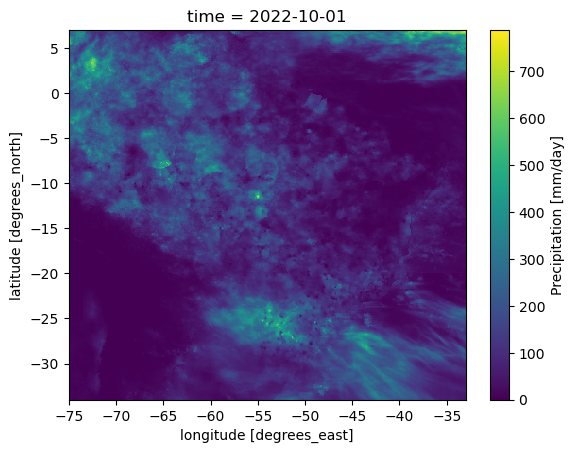

In [196]:
acumulado_mensal.prec[2,:,:].plot()

## Acumulado anual de precipitação

In [200]:
acumulado_anual = ds.resample(time='YS').sum()

In [201]:
acumulado_anual

<xarray.Dataset>
Dimensions:    (longitude: 420, latitude: 410, time: 1)
Coordinates:
  * longitude  (longitude) float64 -74.95 -74.85 -74.75 ... -33.25 -33.15 -33.05
  * latitude   (latitude) float64 -33.95 -33.85 -33.75 -33.65 ... 6.75 6.85 6.95
  * time       (time) datetime64[ns] 2022-01-01
Data variables:
    prec       (time, latitude, longitude) float32 dask.array<chunksize=(1, 410, 420), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Fri Sep 09 08:59:55 2022: cdo -s -f nc4 -z zip9 -co...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

## Média espacial de uma área

In [202]:
acumulado_mensal

<xarray.Dataset>
Dimensions:    (longitude: 420, latitude: 410, time: 3)
Coordinates:
  * longitude  (longitude) float64 -74.95 -74.85 -74.75 ... -33.25 -33.15 -33.05
  * latitude   (latitude) float64 -33.95 -33.85 -33.75 -33.65 ... 6.75 6.85 6.95
  * time       (time) datetime64[ns] 2022-08-01 2022-09-01 2022-10-01
Data variables:
    prec       (time, latitude, longitude) float32 dask.array<chunksize=(1, 410, 420), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Fri Sep 09 08:59:55 2022: cdo -s -f nc4 -z zip9 -co...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

In [212]:
media_area = ds.mean(dim=("longitude", "latitude"))

In [213]:
media_area

<xarray.Dataset>
Dimensions:  (time: 92)
Coordinates:
  * time     (time) datetime64[ns] 2022-08-01 2022-08-02 ... 2022-10-31
Data variables:
    prec     (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>

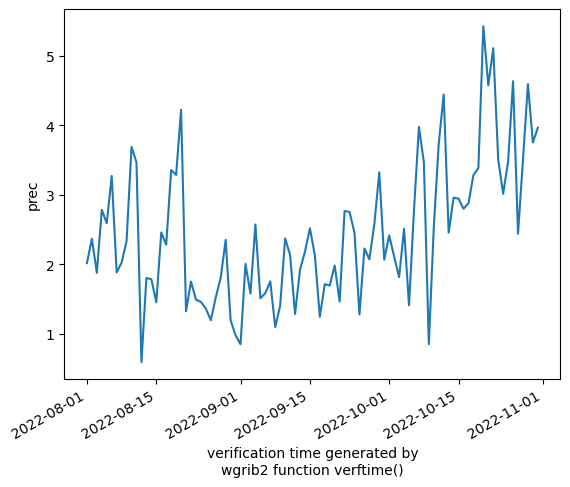

In [214]:
media_area.prec.plot()